In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [40]:
path = '/content/gdrive/MyDrive/Kcal'
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv')
ans = f'{path}/sample_submission.csv'

In [41]:
train

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0


In [42]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [43]:
test.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.560000,104.058200,95.538933,5.247067,5.714933,165.187413,42.943600
std,8.283402,1.391966,9.579919,0.554436,3.510078,32.986667,17.076529
min,1.000000,99.000000,67.000000,4.000000,0.000000,83.800000,20.000000
25%,8.000000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000
50%,16.000000,104.400000,96.000000,5.000000,5.000000,163.100000,40.000000
75%,23.000000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000
max,30.000000,106.700000,123.000000,7.000000,12.000000,282.200000,79.000000


In [44]:
train['Height(cm)'] = (train['Height(Feet)']*30.48)+(train['Height(Remainder_Inches)']*2.54)
test['Height(cm)'] = (test['Height(Feet)']*30.48)+(test['Height(Remainder_Inches)']*2.54)
train['Gender'] = train['Gender'].replace({'F': 0, 'M': 1})
test['Gender'] = test['Gender'].replace({'F': 0, 'M': 1})
train['Weight_Status'] = train['Weight_Status'].replace({'Normal Weight': 0, 'Obese': 1, 'Overweight':2})
test['Weight_Status'] = test['Weight_Status'].replace({'Normal Weight': 0, 'Obese': 1, 'Overweight':2})
train['Body_Temperature(C)'] = round(((train['Body_Temperature(F)'] - 32)*5/9),2)
test['Body_Temperature(C)'] = round(((test['Body_Temperature(F)'] - 32)*5/9),2)
#IB -> kg
train['Weight(kg)'] = round((train['Weight(lb)'] /2.205),1)
test['Weight(kg)'] = round((test['Weight(lb)'] /2.205),1)
#calc BMI
train['BMI'] = round(train['Weight(kg)']/((train['Height(cm)']/100)**2),2)
test['BMI'] = round(test['Weight(kg)']/((test['Height(cm)']/100)**2),2)

In [46]:
train = train.drop(['ID','Body_Temperature(F)', 'Height(Feet)', 'Weight(lb)', 'Height(Remainder_Inches)'], axis=1)
test = test.drop(['ID','Body_Temperature(F)', 'Height(Feet)', 'Weight(lb)', 'Height(Remainder_Inches)'], axis=1)


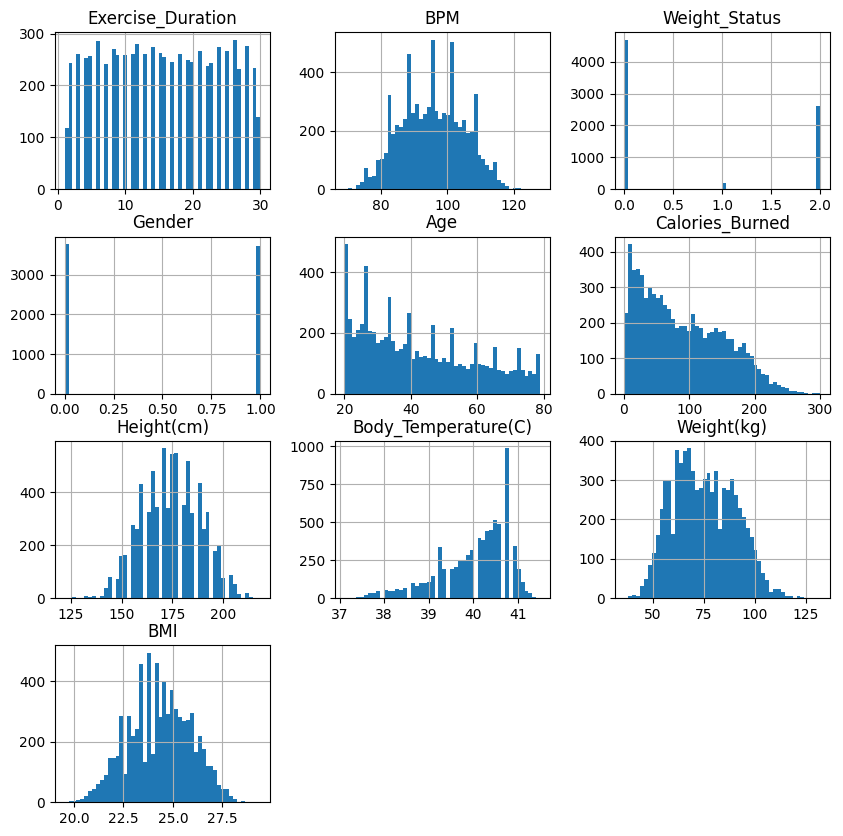

In [47]:
train.hist(bins=50, figsize=(10, 10))
plt.show()

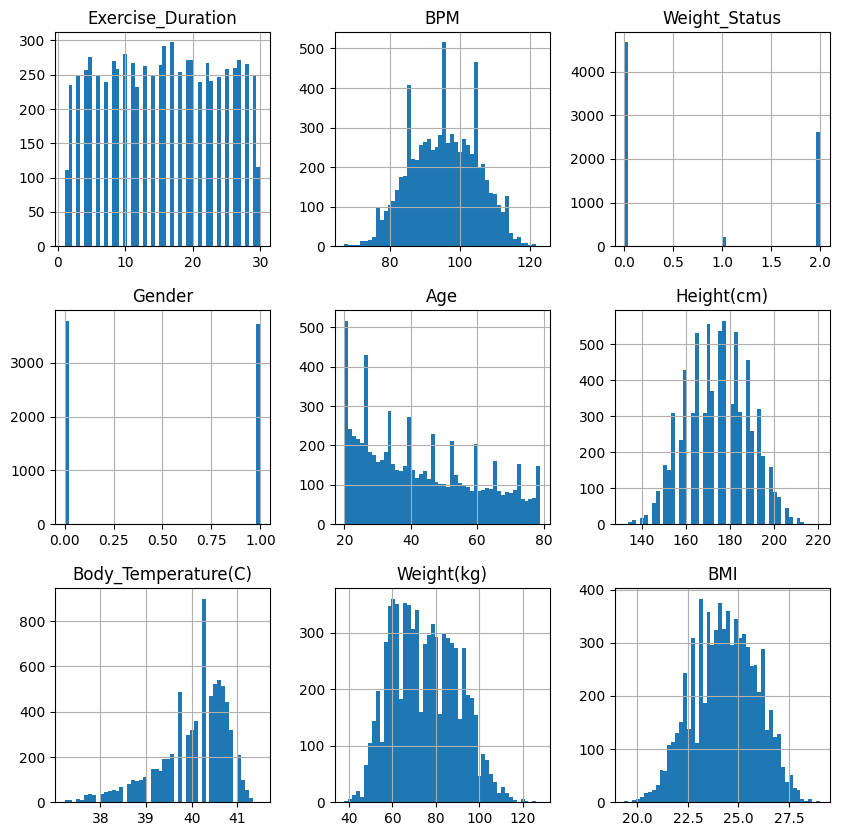

In [48]:
test.hist(bins=50, figsize=(10, 10))
plt.show()

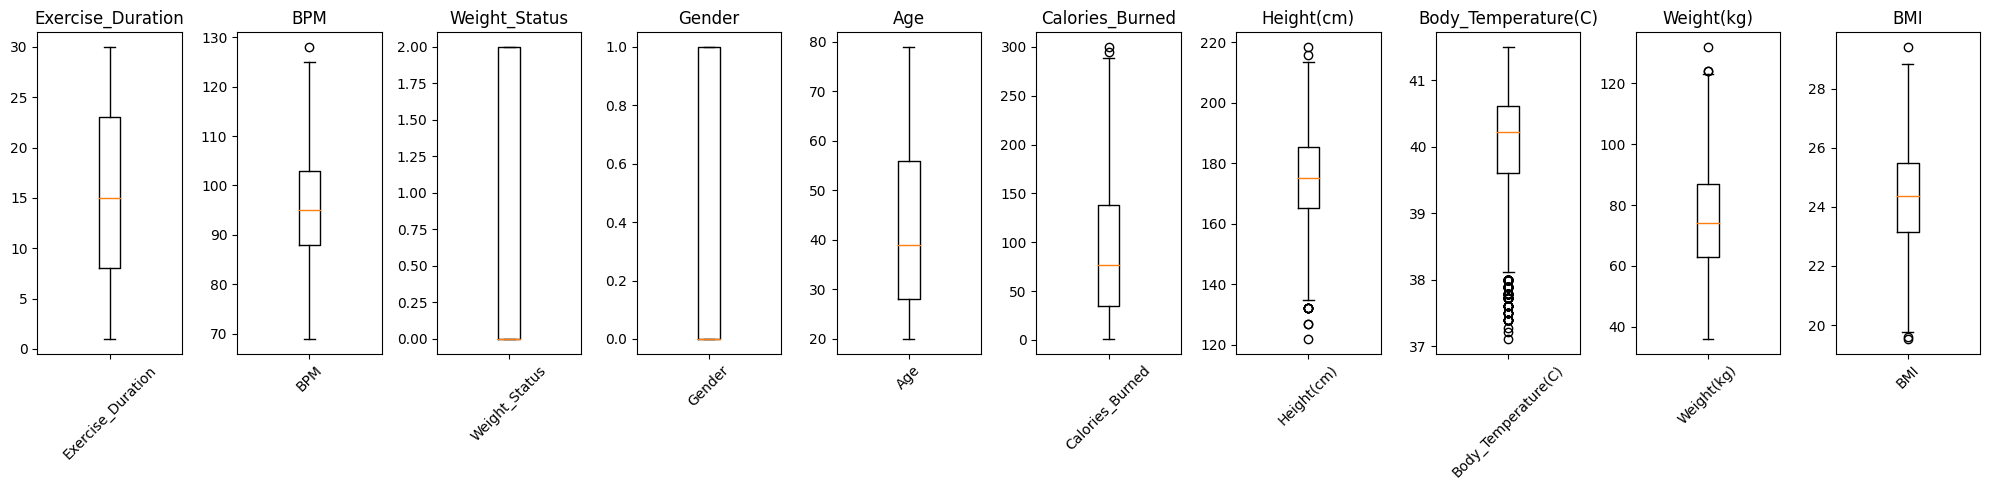

In [49]:
fig, axs = plt.subplots(ncols=len(train.columns), figsize=(20, 5))

for i, column in enumerate(train.columns):
    axs[i].boxplot(train[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xticklabels([column], rotation=45)

plt.tight_layout()
plt.show()

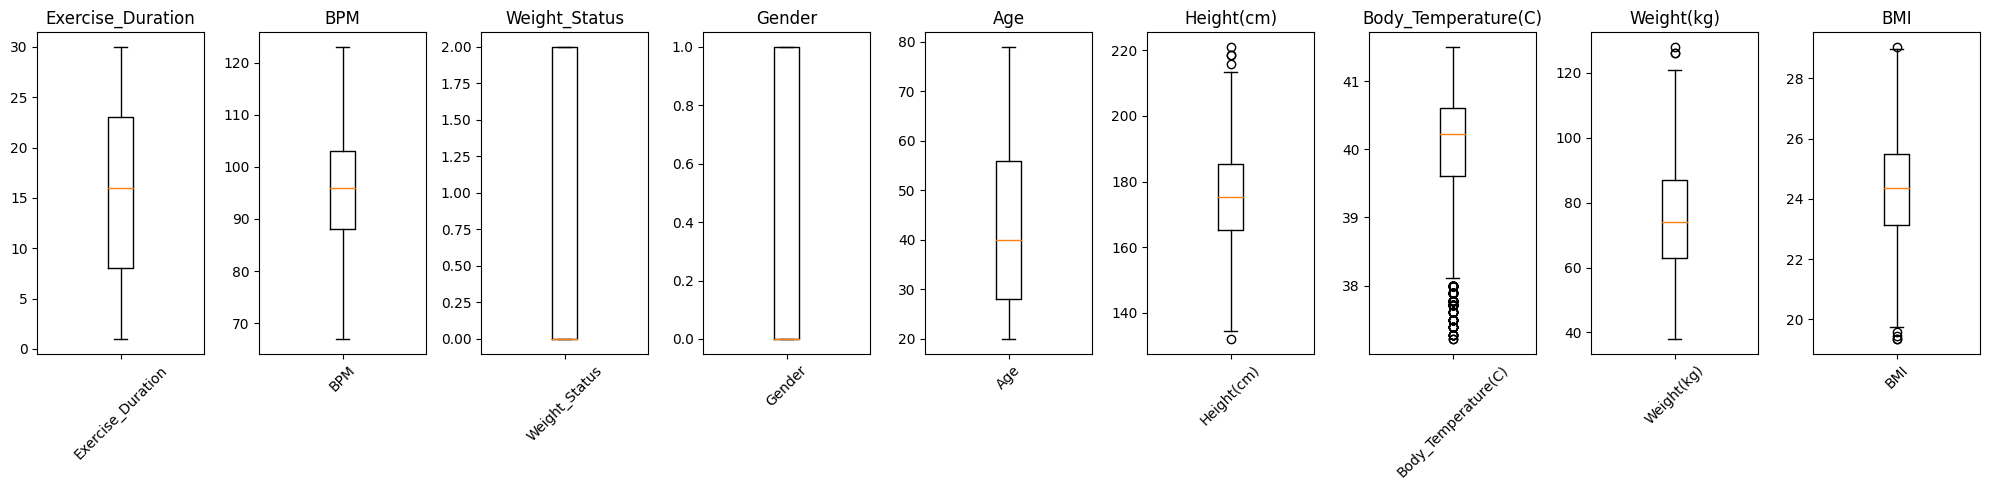

In [50]:
fig, axs = plt.subplots(ncols=len(test.columns), figsize=(20, 5))

for i, column in enumerate(test.columns):
    axs[i].boxplot(test[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xticklabels([column], rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

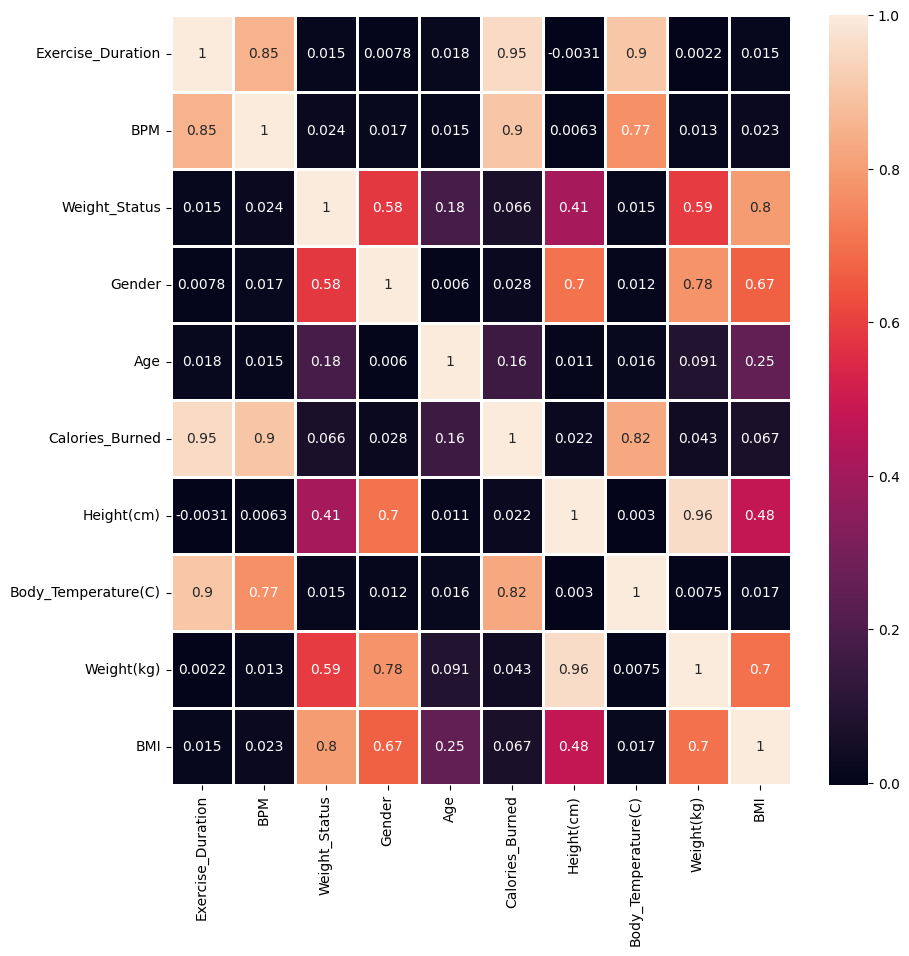

In [51]:
corr_matrix = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidth=1)